## Importing the dependencies

In [1]:
import numpy as np , pandas as pd , matplotlib.pyplot as plt , seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score , recall_score , f1_score

## Data collection and preproseccing 

In [2]:
# loading data as a pandas DataFrame
creditcard = pd.read_csv('creditcard.csv')

In [3]:
# the first 5 rows in the dataframe
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# finding ithe messing values
creditcard.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
# information about the data
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# shape of the data (rows,columns)
creditcard.shape

(284807, 31)

In [7]:
# statistical measures of the data
creditcard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# statistical measure of time , amount , class columns
columns_to_describe = ['Time', 'Amount', 'Class']

In [9]:
creditcard[columns_to_describe].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [10]:
# the values of class column
creditcard['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

#### The data is unbalanced so it will lead to eather overfitting or underfitting  and the model might become overly biased

* 1 == Fraudulent Transactions
* 0 == Non-Fraudulent Transactions

In [11]:
# splitting the data according to class column
non_fraud = creditcard.loc[creditcard['Class'] == 0]
fraud = creditcard.loc[creditcard['Class'] == 1]

print('Non-Fraudulent Transactions:', non_fraud.shape)
print('Fraudulent Transactions:', fraud.shape)

Non-Fraudulent Transactions: (284315, 31)
Fraudulent Transactions: (492, 31)


In [12]:
# taking a random sample from non_fraudlent data
non_fraud = non_fraud.sample(n=492)
print('Non-Fraudulent Transactions:', non_fraud.shape)

Non-Fraudulent Transactions: (492, 31)


In [13]:
# getting the new data bu using pandas library
new_creditcard= pd.concat([non_fraud, fraud], ignore_index=True)

In [14]:
new_creditcard.shape

(984, 31)

In [15]:
new_creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,169255.0,-0.004900,0.828845,-0.433653,-0.474794,0.884992,-0.607008,0.790024,0.044344,0.113380,...,0.113281,0.492487,-0.237488,-0.606549,-0.743636,0.484302,0.184128,0.236825,0.37,0
1,32555.0,-0.723154,-0.002856,2.027475,-1.625353,-0.865103,-0.734737,0.046187,-0.095631,-1.071302,...,-0.134645,-0.006193,-0.109203,0.433758,-0.240067,0.940828,-0.096489,0.127379,44.32,0
2,135791.0,1.835030,-0.831703,-0.370433,0.315014,-1.057935,-0.607583,-0.641633,0.011268,1.725085,...,0.215465,0.643214,0.092653,-0.004452,-0.261562,0.124887,-0.004423,-0.032091,84.95,0
3,148126.0,1.835704,-1.388795,-1.371039,-0.701075,-1.001391,-1.319431,-0.205962,-0.395141,-0.358452,...,0.463010,0.860781,-0.098247,0.078479,-0.035273,-0.058217,-0.072526,-0.028061,209.14,0
4,161154.0,2.023271,0.166754,-1.706940,1.196032,0.615438,-0.649377,0.496618,-0.226366,0.027327,...,0.070749,0.396839,-0.043282,-0.401533,0.460772,-0.484384,-0.020138,-0.077730,1.00,0


In [16]:
new_creditcard['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

#### Now the data is balanced so it won't cause a problem

## Data Analyzation

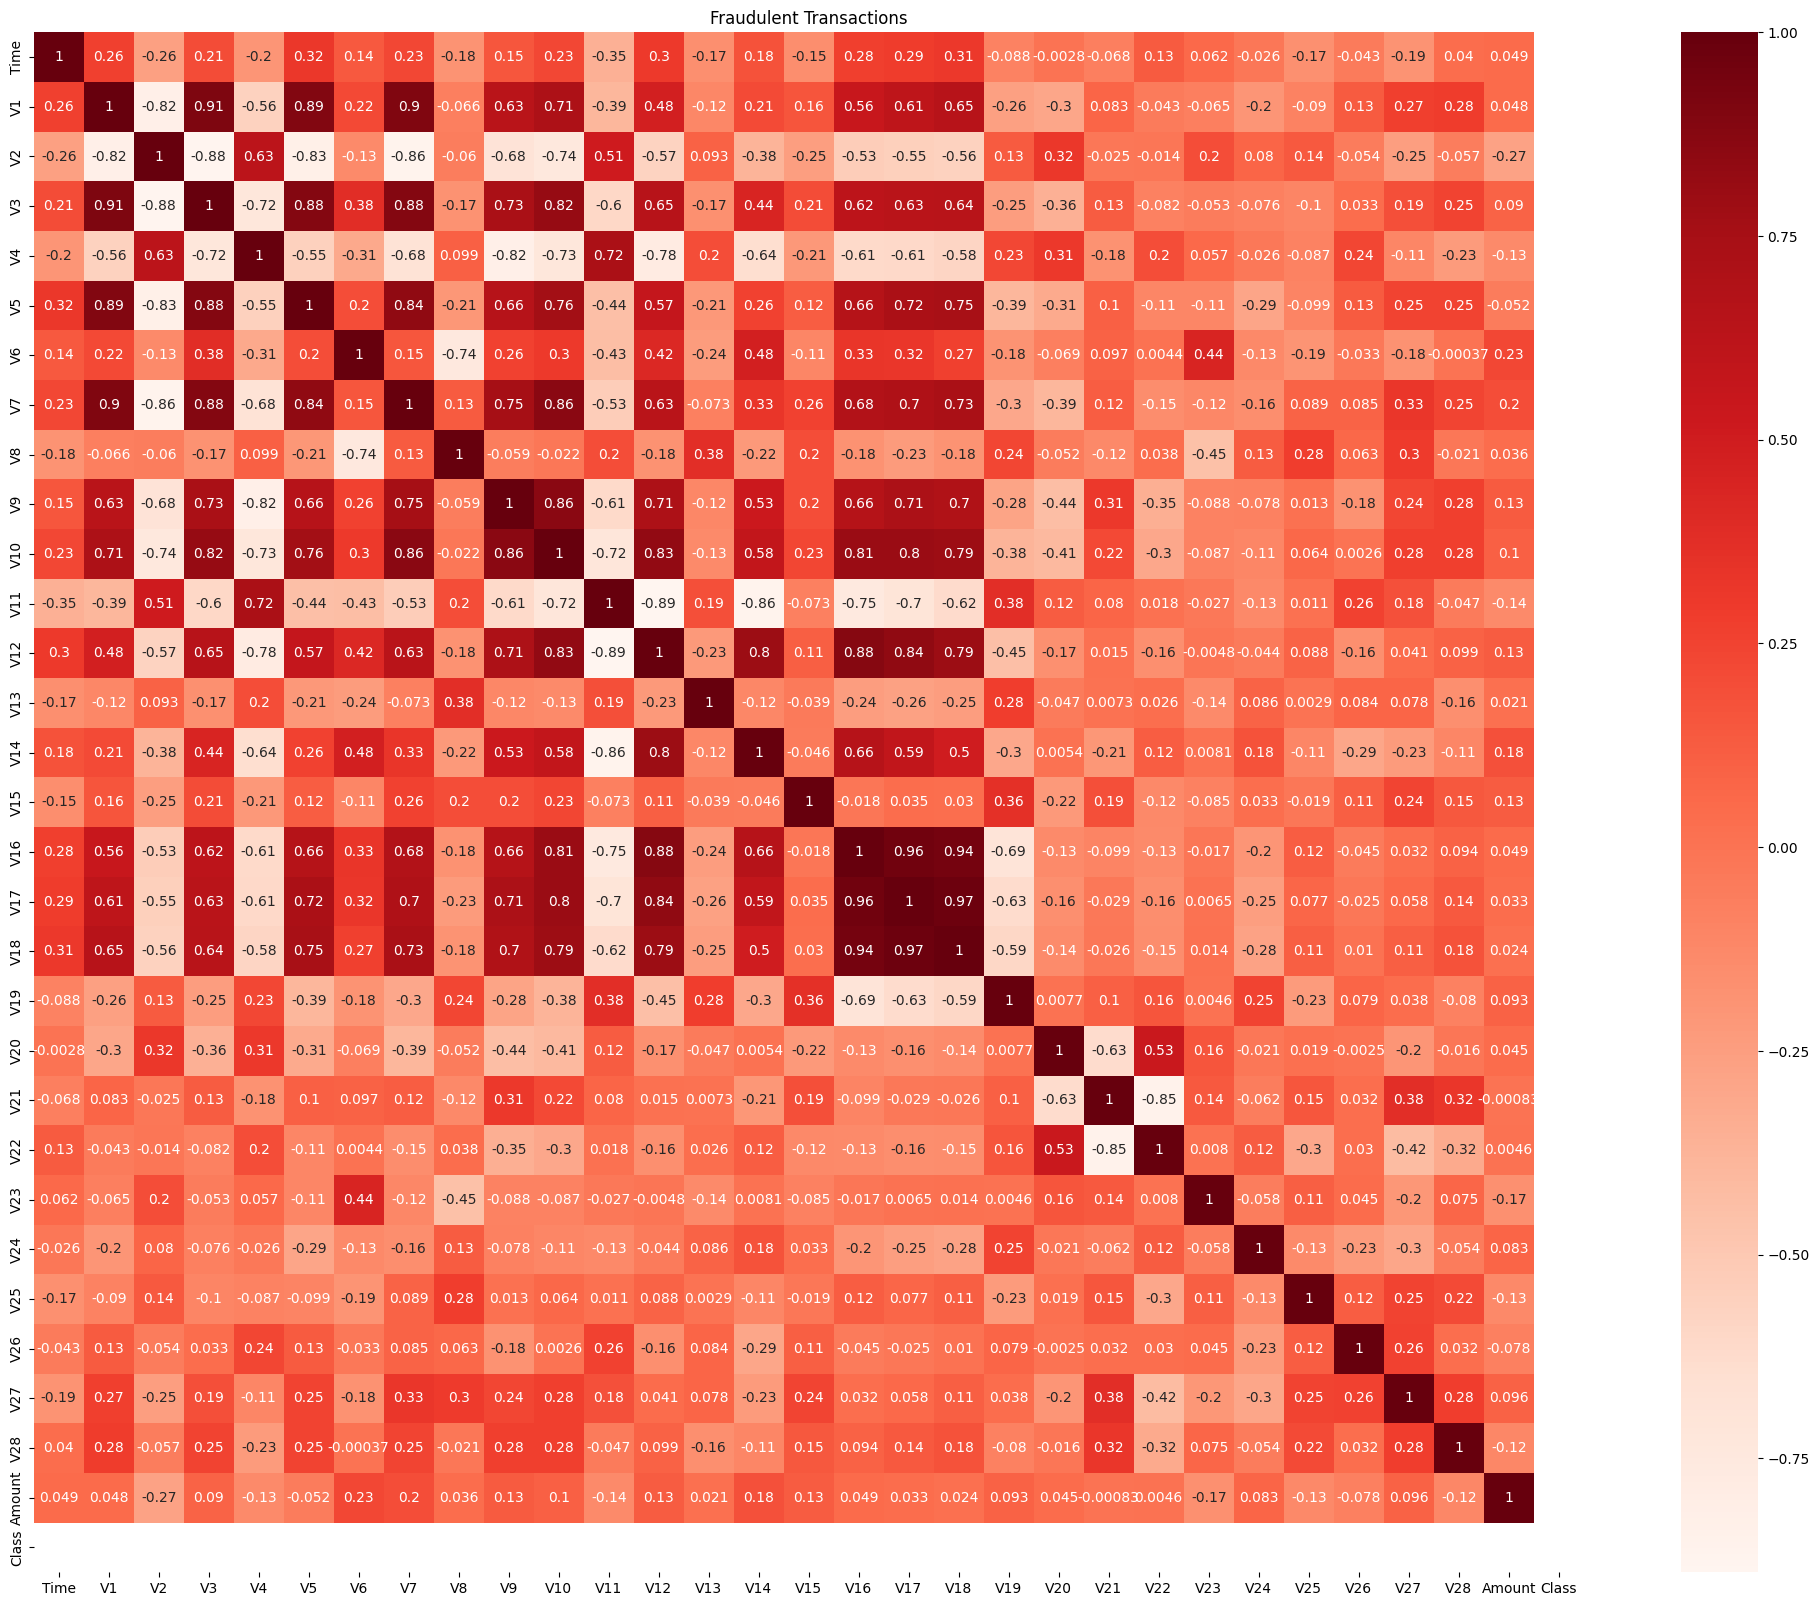

In [17]:
# heat map
plt.figure(figsize=(25,20))
sns.heatmap(fraud.corr(), annot=True, cmap='Reds', cbar=True)
plt.title('Fraudulent Transactions')
plt.show()

## Splitting the data 

In [18]:
x = new_creditcard.drop('Class', axis=1)
y = new_creditcard['Class']

## Train Test Split 

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

## Models

In [20]:
# list of the models
models = [LogisticRegression(max_iter=1000), RandomForestClassifier()]

In [21]:
# Training the model with training data
for model in models:
    model.fit(x_train,y_train)
    x_train_prediction = model.predict(x_train)
    x_test_prediction = model.predict(x_test)    

## Evaluation

In [22]:
# Performance Metrics
Performance_Metrics_list = [precision_score,recall_score,f1_score]

In [23]:
def compare_models():
    for model in models:
        for Performance_Metric in Performance_Metrics_list:
            # Performance Metrics for training data
            Performance_Metric_train = Performance_Metric (x_train_prediction,y_train)
            print (Performance_Metric, 'of', model, 'for training data:',Performance_Metric_train)
            print('-------------------------------------------------------------------')
            # Performance Metrics for testing data
            Performance_Metric_test = Performance_Metric (x_test_prediction,y_test)
            print (Performance_Metric, 'of', model, 'for testing data:',Performance_Metric_test)
            print('-------------------------------------------------------------------')            

In [24]:
compare_models()

<function precision_score at 0x000002325844F910> of LogisticRegression(max_iter=1000) for training data: 1.0
-------------------------------------------------------------------
<function precision_score at 0x000002325844F910> of LogisticRegression(max_iter=1000) for testing data: 0.8921568627450981
-------------------------------------------------------------------
<function recall_score at 0x000002325844FA30> of LogisticRegression(max_iter=1000) for training data: 1.0
-------------------------------------------------------------------
<function recall_score at 0x000002325844FA30> of LogisticRegression(max_iter=1000) for testing data: 1.0
-------------------------------------------------------------------
<function f1_score at 0x000002325844F2E0> of LogisticRegression(max_iter=1000) for training data: 1.0
-------------------------------------------------------------------
<function f1_score at 0x000002325844F2E0> of LogisticRegression(max_iter=1000) for testing data: 0.9430051813471504